## Augmentation functions of aritmetic group
#### **[overview]()** **[docs]()**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import imgaug as ia
from imgaug import augmenters as iaa
from imgaug import parameters as iap

In [2]:
image = ia.quokka(size=(128, 128), extract="square")

In [3]:
# Define our augmentation pipeline.
seq = iaa.Sequential([
    iaa.SomeOf((0,1),[
            iaa.BlendAlphaFrequencyNoise(
                foreground=iaa.EdgeDetect(1.0),
                per_channel=True
            ),
            iaa.ElasticTransformation(alpha=50, sigma=5),  # apply water effect (affects segmaps)
            
            iaa.ReplaceElementwise(
                iap.FromLowerResolution(
                    iap.Binomial(0.1), size_px=8
                ),
                iap.Normal(128, 0.3*128),
                per_channel=0.5
            )
        ]
    ),
    iaa.PiecewiseAffine(scale=iap.Absolute(iap.Normal(0, 0.03))),
    iaa.Sharpen((0.0, 1.0)),       # sharpen the image
    iaa.Affine(
        rotate=(-45, 45),
        mode="edge"
    )  # rotate by -45 to 45 degrees (affects segmaps)

], random_order=True)

In [4]:
def print_aug(aug, n=16):
    # Augment images and segmaps.
    images_aug = []

    for _ in range(n):
        images_aug_i = aug(image=image)
        images_aug.append(images_aug_i)

    cells = []
    for image_aug in images_aug:
        cells.append(image_aug)                                      

    # Convert cells to a grid image and save.
    result_grid_image = ia.draw_grid(cells, cols=8)

    # plot functions 
    # note that the last image is augmented by matplotlib to make classes distingushable

    plt.figure()
    f, window = plt.subplots(1,1,figsize=(40,20)) 
    window.imshow(result_grid_image)
    window.axis('off')

<Figure size 432x288 with 0 Axes>

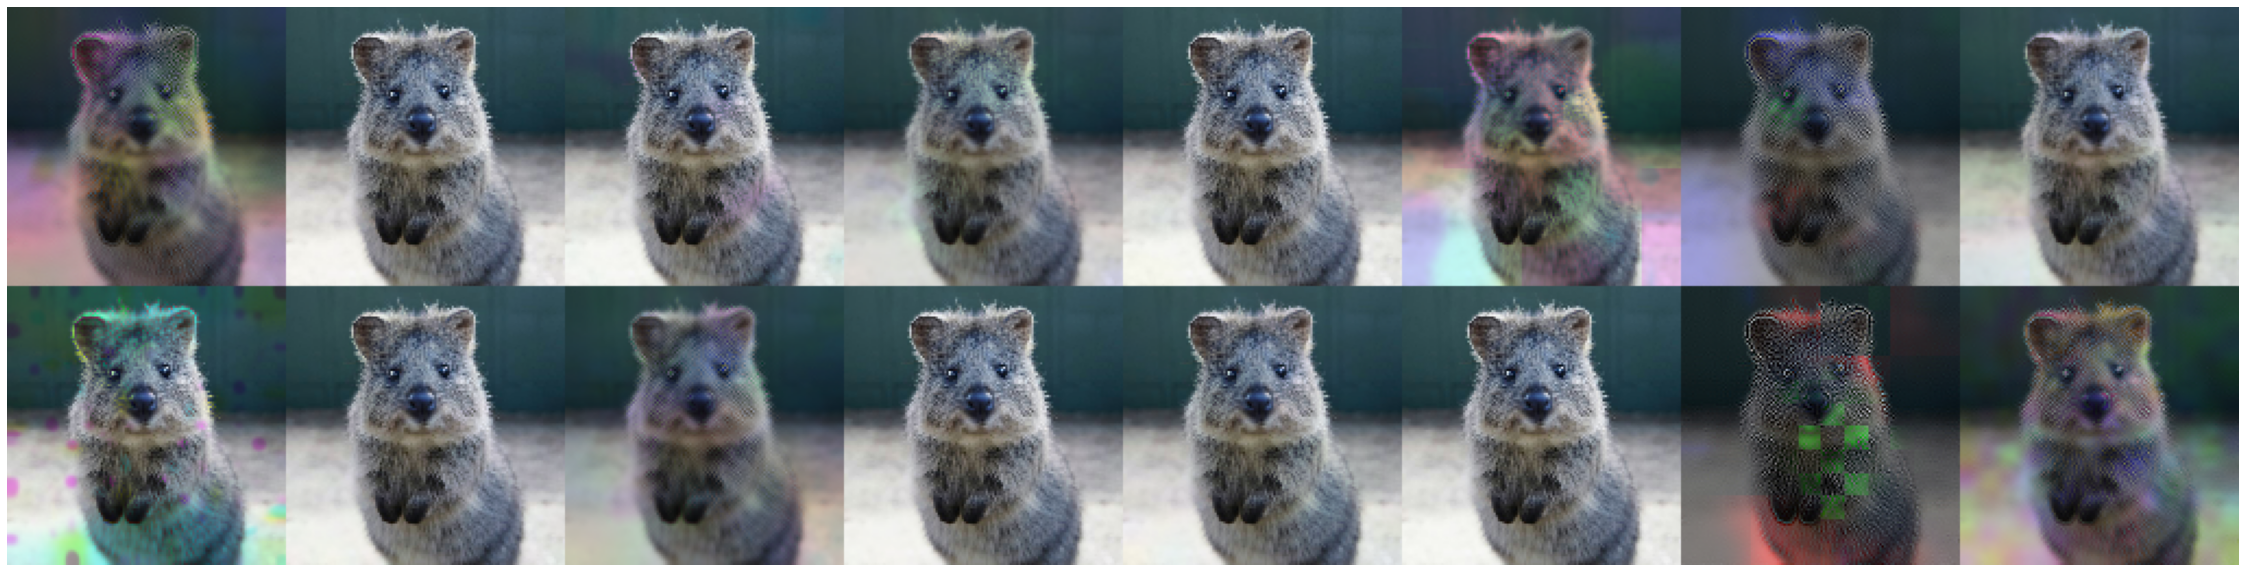

In [5]:
seq = iaa.BlendAlphaFrequencyNoise(
    foreground=iaa.EdgeDetect(iap.Absolute(iap.Normal(0.1, 0.25))),
    per_channel=True
)

print_aug(seq)

<Figure size 432x288 with 0 Axes>

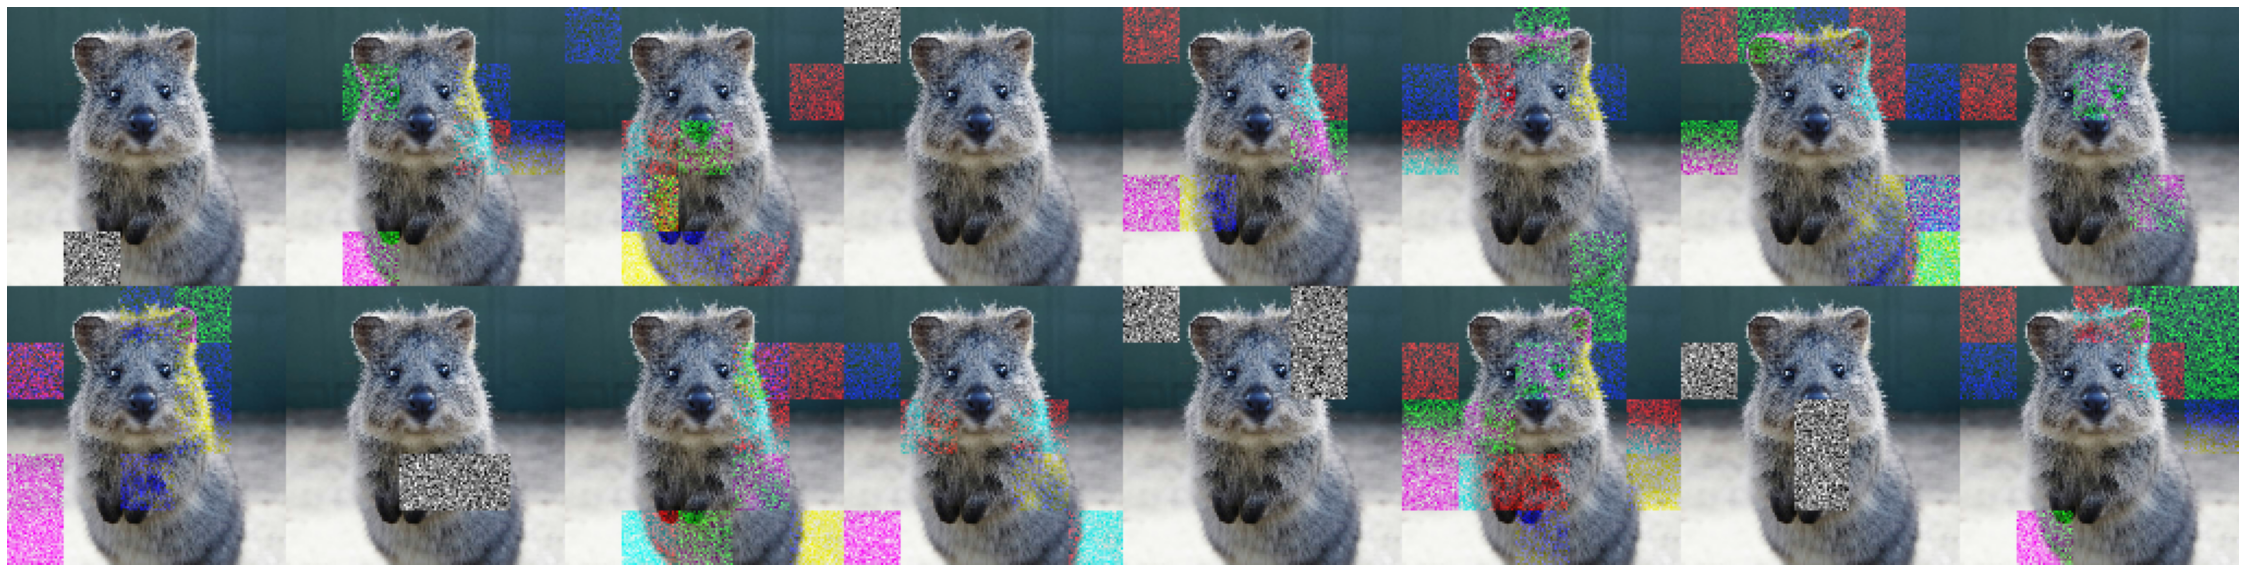

In [6]:
seq = iaa.ReplaceElementwise(
    iap.FromLowerResolution(
        iap.Binomial(0.1), size_px= 5
    ),
    iap.Normal(128, 0.4*128),
    per_channel=0.5
)

print_aug(seq)